In [1]:
package_path = 'unetmodelscript/'
import sys
sys.path.append(package_path)

In [2]:
import pdb
import os
import cv2
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch.backends.cudnn as cudnn
from torch.utils.data import DataLoader, Dataset
from albumentations import (Normalize, Compose)
from albumentations.pytorch import ToTensor
import torch.utils.data as data
from model import Unet

In [3]:
# Initialize mode and load trained weights
ckpt_path = "model.pth"
device = torch.device("cuda")
model = Unet("resnet18", encoder_weights=None, classes=4, activation=None)
model.to(device)
model.eval()
state = torch.load(ckpt_path, map_location=lambda storage, loc: storage)
model.load_state_dict(state["state_dict"])

<All keys matched successfully>

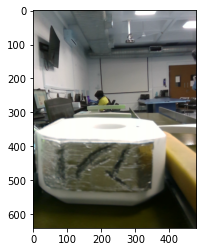

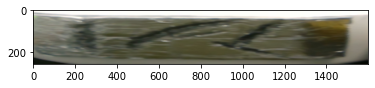

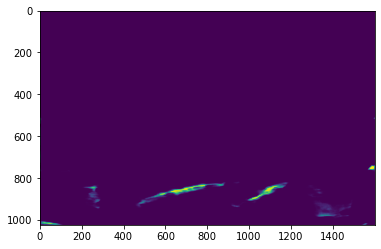

In [4]:
img = cv2.imread("sample_images/notok_color.png")
img = cv2.rotate(img, cv2.cv2.ROTATE_90_COUNTERCLOCKWISE)
plt.imshow(img)
plt.show()
img = img[360:550,30:370,:]

img = cv2.resize(img,dsize=(1600,256),interpolation=cv2.INTER_AREA)
plt.imshow(img)
plt.show()
img = np.transpose(img, (2,0,1))
img = np.expand_dims(img,0)
img = torch.from_numpy(img)
img = img.float()

mask = torch.sigmoid(model(img.to(device)))
mask = mask.squeeze().detach().cpu().numpy()
mask = np.transpose(mask, (1,2,0))
plt.imshow(np.vstack((mask[:,:,0],mask[:,:,1],mask[:,:,2],mask[:,:,3])))
plt.show()